### Student Information
Name: Jason Hsieh

Student ID: 110065539

GitHub ID: chillmelon

Kaggle name: chillmelon

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

## First part

### Read data

In [1]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("from_lab2/train_df.pkl")
test_df = pd.read_pickle("from_lab2/test_df.pkl")

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


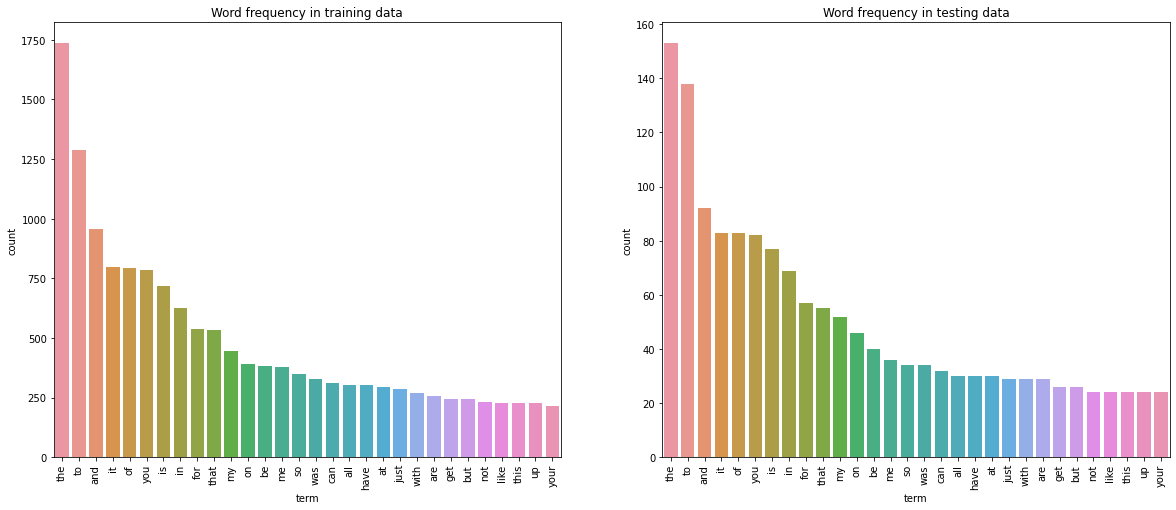

In [2]:
# Answer here
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features=30)

train_word_count = count_vect.fit_transform(train_df.text)
train_top_words = count_vect.get_feature_names_out()
train_word_freq = np.asarray(train_word_count.sum(axis=0))[0]

test_word_count = count_vect.fit_transform(test_df.text)
test_top_words = count_vect.get_feature_names_out()
test_word_freq = np.asarray(test_word_count.sum(axis=0))[0]

train_df_to_draw = pd.DataFrame({"term": train_top_words, "count": train_word_freq}).sort_values("count", ascending=False)
test_df_to_draw = pd.DataFrame({"term": test_top_words, "count": test_word_freq}).sort_values("count", ascending=False)

figure, axes = plt.subplots(1, 2, sharex=True, figsize=(20,8))
axes[0].set_title('Word frequency in training data')
axes[1].set_title('Word frequency in testing data')

g_train = sns.barplot(ax=axes[0], x=train_df_to_draw["term"], y=train_df_to_draw["count"])
g_train.set_xticklabels(train_df_to_draw["term"], rotation=90)

g_test = sns.barplot(ax=axes[1], x=test_df_to_draw["term"], y=test_df_to_draw["count"])
g_test.set_xticklabels(test_df_to_draw["term"], rotation=90)

plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [3]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzer
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
tfidf_1000.fit(train_df['text'])

train_data_tfidf_features_1000 = tfidf_1000.transform(train_df['text'])

## check dimension
train_data_tfidf_features_1000.shape

# get feature names
print(tfidf_1000.get_feature_names()[100:110])

/usr/local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### Copied from lab2

In [4]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

In [5]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [6]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

training accuracy: 0.99
testing accuracy: 0.66
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.66      0.69      0.68       110
         joy       0.70      0.68      0.69        79
     sadness       0.65      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



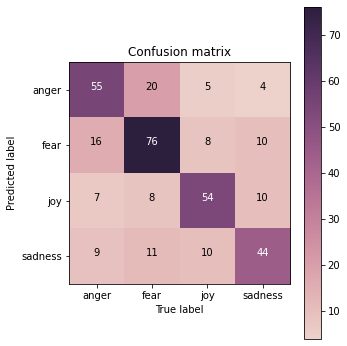

In [7]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### Answer:
The diagnal are where the model did right, and all the others are where the model messed up.
In this case, the result is not so bad. But it's not very good though, the accuracy is just slightly above 50%.

### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



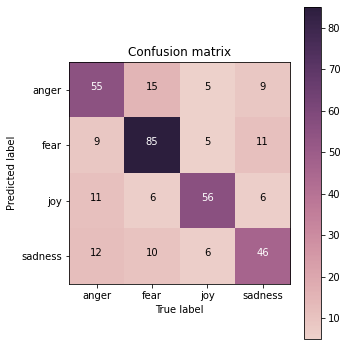

In [8]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# build and train naiva bayes model
clf = MultinomialNB()
clf = clf.fit(X_train, y_train)


# predict!
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# print result
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=y_test_pred))

# show confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer
I think the Decision Tree model is overfitting, since the training accuracy is 0.99.
And the Naive Bayes model doesn't seem to have this problem.

### Copied from Lab2

In [9]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("from_lab2/logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.366731,1.334415,0.406340,1.287343
1,1,0.639358,1.003233,0.642651,0.940978
2,2,0.791863,0.593014,0.691643,0.815929
3,3,0.841960,0.419345,0.697406,0.811607
4,4,0.883476,0.333020,0.688761,0.823114
5,5,0.905895,0.276142,0.700288,0.871317
6,6,0.925270,0.227339,0.665706,0.942261
7,7,0.939939,0.192673,0.677233,1.006173
8,8,0.951564,0.164127,0.674352,1.078026
9,9,0.954332,0.145138,0.668588,1.126875


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

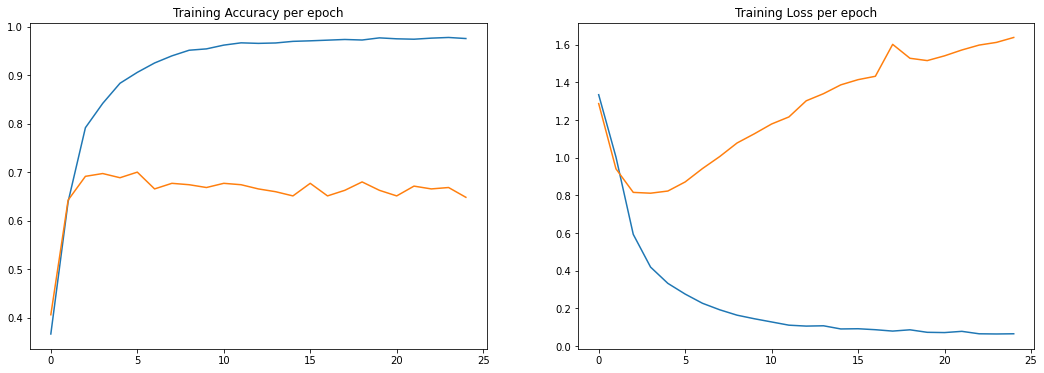

In [10]:
# Answer here
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

ax1.set_title("Training Accuracy per epoch")
ax1.plot(training_log.epoch, training_log.accuracy, label="Train_accuracy")
ax1.plot(training_log.epoch, training_log.val_accuracy, label="Val_accuracy")

ax2.set_title("Training Loss per epoch")
ax2.plot(training_log.epoch, training_log.loss, label="Train_accuracy")
ax2.plot(training_log.epoch, training_log.val_loss, label="Val_accuracy")

### My interpretation:
This is typical overfitting. 
The testing accuracy drops while the training accuracy is increasing.
And the testing loss increases while the training loss is dropping.
To fix this, we can add dropout layers to the model.

### Code needed for Exercise 7

In [11]:
# tokenize the text
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
test_df['text_tokenized'] = test_df['text'].apply(lambda x: nltk.word_tokenize(x))

In [12]:
from gensim.models import Word2Vec

## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model

word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

In [13]:
## deal with label (string -> one-hot)
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2780        joy
2828    sadness
2664        joy
746       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### Answers:

- Accoding to keras [documentation](https://keras.io/examples/nlp/pretrained_word_embeddings/), I have to transform **tokenized text** into vocabulary index.
- And then add an embedding layer in the model.

In [14]:
for sentence in train_df["text_tokenized"][:5]:
    print(len(sentence))

27
6
21
24
8


- As we can see the lengths of all sentences are not uniformed, so I have to fill in zeros when I'm trying to generate the **word_index matrix**. 
- In this case, if the sentence is too short, then most of it's word vector would be zero. That will decrease the accuracy. So I decided to set 20 as a fix length.

In [15]:
# generate vocaburary index matrix and fill zeros
def gen_matrix(data, length):
    mx = np.zeros([len(data), length], dtype=int)
    for i in range(len(data)):
        for j in range(min(len(data[i]), length)):
            try:
                # since the first vector represents null, we have to add 1 to all the word_index
                mx[i, j] = word2vec_model.wv.key_to_index[data[i][j]] + 1
            except KeyError:
                mx[i, j] = 0
    return mx

X_train = gen_matrix(train_df.text_tokenized, 20)
X_test = gen_matrix(test_df.text_tokenized, 20)

In [16]:
for row in X_train[:5]:
    print(len(row))

20
20
20
20
20


And in embedding matrix, we have to add a 0 vector.

In [17]:
embedding_matrix = word2vec_model.wv.vectors
embedding_matrix = np.vstack((np.array(np.zeros(embedding_matrix.shape[1])), embedding_matrix))

Now, we can build the model. Different to the model in Lab2:
- I add an embedding layer to the model. The weight is fixed to our word2vec matrix, so it's untrainable.
- And since the Dense layer can only take 1D input, I have to add a Flatten layer to reduce the dimension
- In addition to Flatten, we can also utilize RNN or LSTM.

In [18]:
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from keras.layers import ReLU, Softmax
from tensorflow.keras.utils import plot_model

num_tokens = len(word2vec_model.wv.key_to_index) + 1
embedding_dim = embedding_matrix.shape[1]

# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)


input_shape:  20
output_shape:  4


- I add an embedding layer to the model
- And since the Dense layer can only take 1D input, I have to add a Flatten layer to reduce the dimension

In [19]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False
)

In [20]:
# input layer
model_input = Input(shape=(input_shape, ))

# embedding layer
embedded_sequences = embedding_layer(model_input) # 2D

# flatten layer
flatten = Flatten()(embedded_sequences) # 1D

2022-01-12 15:56:18.949248: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The rest are the same as Lab2

In [21]:
# 1st hidden layer
X_W1 = Dense(units=64)(flatten)  # 64
H1 = ReLU()(X_W1)

# 2ndb hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding (Embedding)       (None, 20, 100)           1188500   
                                                                 
 flatten (Flatten)           (None, 2000)              0         
                                                                 
 dense (Dense)               (None, 64)                128064    
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0     

## >>> Exercise 8 (Take home):
Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).



### Copied from lab2

In [22]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "from_lab2/google_news_data/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


### Answer

In [23]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


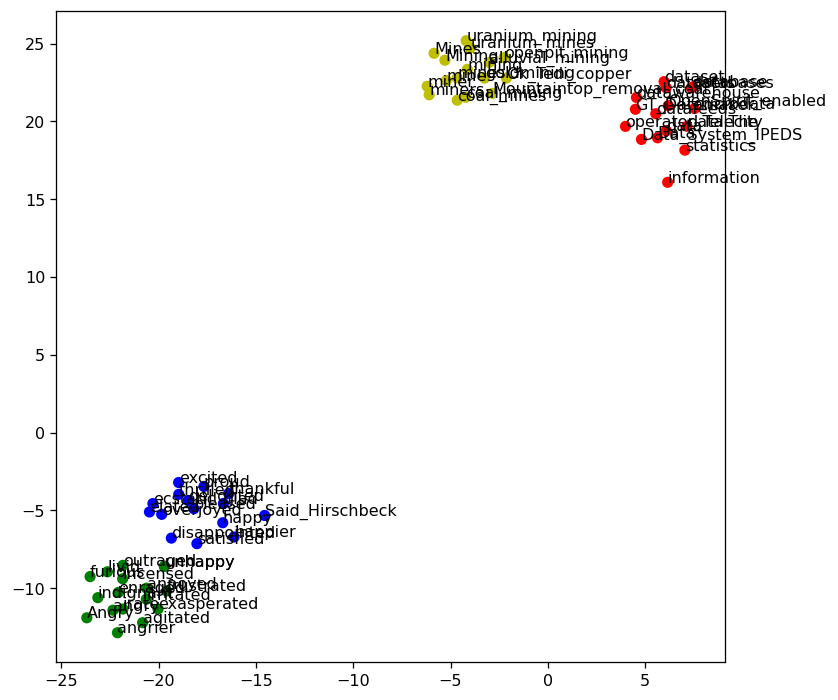

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()
